In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data_path = ("../data_sets/smsspamcollection/SMSSpamCollection")

sms_raw = pd.read_table(data_path, header=None)

sms_raw.columns = ['class','message']

In [6]:
sms_raw.head(3)

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [15]:
sms_raw.value_counts('class')

class
ham     4825
spam     747
dtype: int64

In [17]:
sms_raw.shape

(5572, 2)

In [18]:
keywords = ['free', 'click', 'urgent', 'buy', 'visit', 'win', 'dollars']

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ', case = False)

In [19]:
sms_raw.shape

(5572, 9)

In [22]:
sms_raw.tail(5)

,class,message,free,click,urgent,buy,visit,win,dollars
5567,spam,This is the 2nd time we have tried 2 contact u...,False,False,False,False,False,False,False
5568,ham,Will ü b going to esplanade fr home?,False,False,False,False,False,False,False
5569,ham,"Pity, * was in mood for that. So...any other s...",False,False,False,False,False,False,False
5570,ham,The guy did some bitching but I acted like i'd...,False,False,False,False,False,False,False
5571,ham,Rofl. Its true to its name,False,False,False,False,False,False,False


In [23]:
sms_raw['allCaps'] = sms_raw.message.str.isupper() #make row for only all Cap messages

In [25]:
sms_raw[sms_raw.allCaps==True].head(4)

,class,message,free,click,urgent,buy,visit,win,dollars,allCaps
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,False,False,False,False,False,False,False,True
43,ham,WHO ARE YOU SEEING?,False,False,False,False,False,False,False,True
72,ham,HI BABE IM AT HOME NOW WANNA DO SOMETHING? XX,False,False,False,False,False,False,False,True
263,ham,MY NO. IN LUTON 0125698789 RING ME IF UR AROUN...,False,False,False,False,False,False,False,True


In [26]:
sms_raw.corr()

,free,click,urgent,buy,visit,win,dollars,allCaps
free,1.000000,-0.005735,-0.006624,-0.016623,0.072655,0.043990,-0.004054,-0.022883
click,-0.005735,1.000000,-0.001245,-0.003124,-0.001706,0.050065,-0.000762,-0.004301
urgent,-0.006624,-0.001245,1.000000,-0.003608,-0.001970,-0.003923,-0.000880,-0.004967
buy,-0.016623,-0.003124,-0.003608,1.000000,-0.004944,0.008749,-0.002209,-0.012465
visit,0.072655,-0.001706,-0.001970,-0.004944,1.000000,-0.005375,-0.001206,-0.006806
win,0.043990,0.050065,-0.003923,0.008749,-0.005375,1.000000,-0.002401,-0.013551
dollars,-0.004054,-0.000762,-0.000880,-0.002209,-0.001206,-0.002401,1.000000,-0.003040
allCaps,-0.022883,-0.004301,-0.004967,-0.012465,-0.006806,-0.013551,-0.003040,1.000000


<AxesSubplot:>

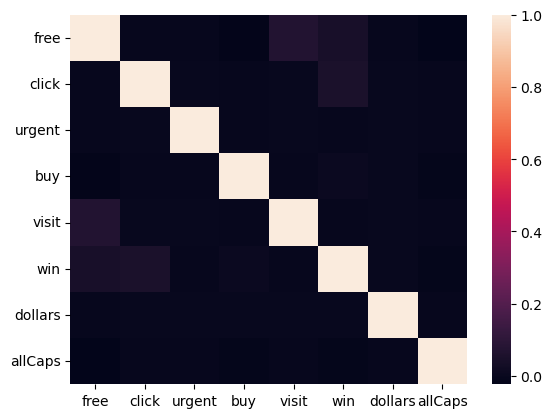

In [29]:
sns.heatmap(sms_raw.corr())

In [36]:
data = sms_raw[keywords + ['allCaps']]

target = sms_raw['class']

In [37]:
data.head(3)

,free,click,urgent,buy,visit,win,dollars,allCaps
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False


In [39]:
# Our Data is binary/boolean, so we're importing Bernoulli classifier.

from sklearn.naive_bayes import BernoulliNB

#Instantiate model and store it in a new variable 

bnb = BernoulliNB()

#fit model to data

bnb.fit(data, target)

#Classify, storing the result in a new variable.

y_pred = bnb.predict(data)

#Display our results.

print("Number of mislabled points out of total {} points : {}".format( 
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabled points out of total 5572 points : 622


In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(target, y_pred)

array([[4772,   53],
       [ 569,  178]])